In [1]:
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import html5lib
import requests
from openpyxl import Workbook
from datetime import datetime
import webbrowser
import os

In [2]:
path = '../Test_GBDC_Investment.xlsx'
xls = pd.ExcelFile(path)
all_sheets = pd.read_excel(path, sheet_name=None)

In [3]:
dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df
    print(f"DataFrame name: {sheet_name} : {sheet_df.shape}")

DataFrame name: March 31 2013 : (438, 31)
DataFrame name: June 30 2013 : (445, 31)
DataFrame name: September 30 2013 : (501, 41)
DataFrame name: December 31 2013 : (452, 31)
DataFrame name: March 31 2014 : (483, 31)
DataFrame name: June 30 2014 : (206, 27)
DataFrame name: September 30 2014 : (543, 33)
DataFrame name: December 31 2014 : (534, 31)
DataFrame name: March 31 2015 : (550, 31)
DataFrame name: June 30 2015 : (592, 31)
DataFrame name: September 30 2015 : (609, 1701)
DataFrame name: December 31 2015 : (67, 27)
DataFrame name: March 31 2016 : (623, 27)
DataFrame name: June 30 2016 : (80, 27)
DataFrame name: September 30 2016 : (751, 23)
DataFrame name: December 31 2016 : (692, 23)
DataFrame name: March 31 2017 : (722, 23)
DataFrame name: June 30 2017 : (740, 23)
DataFrame name: December 31 2017 : (785, 41)
DataFrame name: March 31 2018 : (817, 25)
DataFrame name: June 30 2018 : (871, 25)
DataFrame name: September 30 2018 : (940, 24)
DataFrame name: December 31 2018 : (977, 41)
Da

In [4]:
for dataframe in dataframes:
    # print(dataframe, ':',
    #       dataframes[dataframe].loc[dataframes[dataframe].shape[0]-1][0])
    if dataframes[dataframe].shape[0]-1 < 250:
        print(
            dataframe, ':', dataframes[dataframe].shape[0]-1)

June_30_2014 : 205
December_31_2015 : 66
June_30_2016 : 79


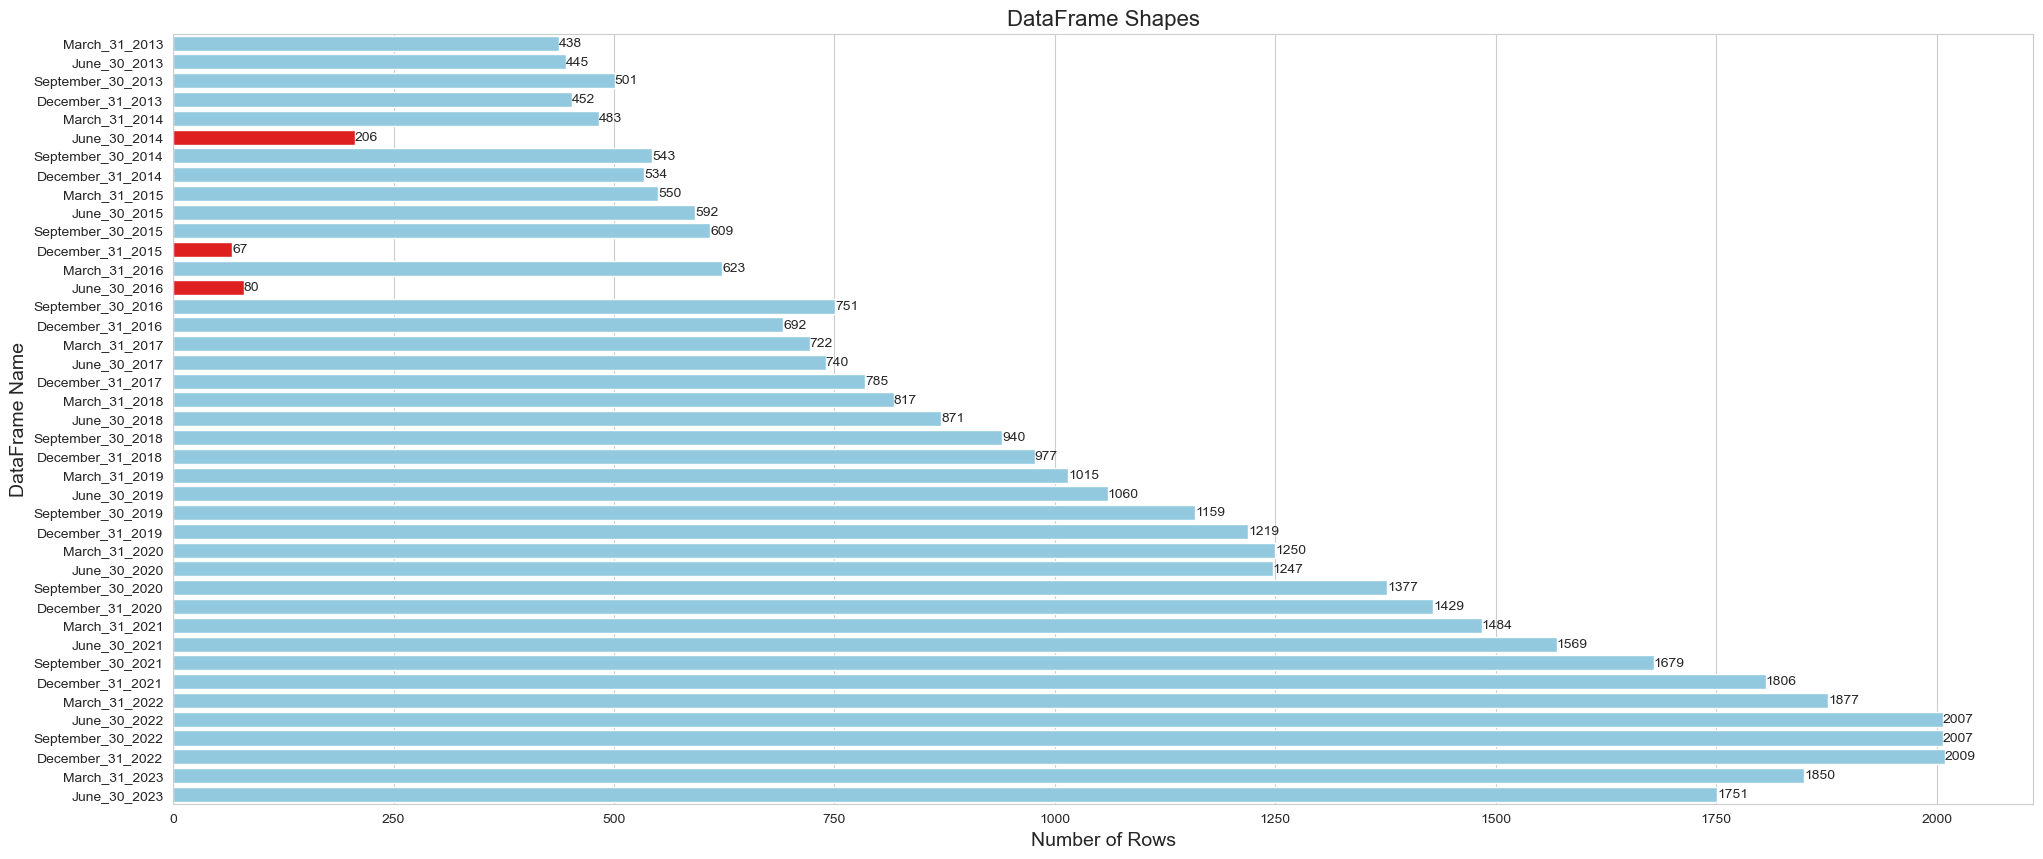

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df

# Extract DataFrame names and shapes
df_names = []
df_shapes = []
for sheet_name, sheet_df in dataframes.items():
    df_names.append(sheet_name)
    df_shapes.append(sheet_df.shape)

# Create a bar graph with Seaborn
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")

# Create a Seaborn barplot
sns.barplot(x=[shape[0] for shape in df_shapes], y=df_names, palette=[
    'red' if shape[0] < 250 else 'skyblue' for shape in df_shapes])

# Customize the appearance of bars
for i, shape in enumerate(df_shapes):
    width = shape[0]
    plt.text(width, i, f'{int(width)}', ha='left', va='center')

# Adjust font size
plt.xlabel('Number of Rows', fontsize=14)
plt.ylabel('DataFrame Name', fontsize=14)
plt.title('DataFrame Shapes', fontsize=16)

plt.show()

In [8]:
df = dataframes['June_30_2022']
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Investment Type,NaN,SpreadAboveIndex(1),NaN,InterestRate(2),NaN,MaturityDate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Non-controlled/non-affiliate company investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Debt investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,"Rubio's Restaurants, Inc",NaN,"17,559",NaN,NaN,4,NaN,NaN,(33),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,"Sloan Company, Inc.",NaN,"5,162",NaN,NaN,"1,293",NaN,NaN,(463),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,Switchfly LLC,NaN,"6,168",NaN,NaN,"1,305",NaN,NaN,—,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,Uinta Brewing Company,NaN,462,NaN,NaN,22,NaN,NaN,(498),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
def process_table(soi_table_df):
    print(1, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace(r'^\s*\$\s*$', np.nan, regex=True)
    print(2, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=1)
    print(3, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=0)
    print(4, 'shape:', soi_table_df.shape)
    soi_table_df.dropna()
    print(5, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.rename(
        columns=soi_table_df.iloc[0]).drop(soi_table_df.index[0])
    print(6, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace('—', 0, regex=False)
    print(7, 'shape:', soi_table_df.shape)

    return soi_table_df


process_table = process_table(df)
process_table.to_csv("process_table.csv")
process_table

1 shape: (2007, 64)
2 shape: (2007, 64)
3 shape: (2007, 26)
4 shape: (1777, 26)
5 shape: (1777, 26)
6 shape: (1776, 26)
7 shape: (1776, 26)


,NaN,NaN,Investment Type,NaN,SpreadAboveIndex(1),NaN,InterestRate(2),NaN,MaturityDate,NaN,...,FairValue(4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Non-controlled/non-affiliate company investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Debt investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Aerospace and Defense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NTS Technical Systems*#+~,Senior loan,NaN,L + 5.50%,(b),NaN,6.50%,NaN,06/2023,...,"39,763",NaN,NaN,1.6,%,NaN,"39,870",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,"Rubio's Restaurants, Inc",NaN,"17,559",NaN,NaN,4,NaN,NaN,(33),NaN,...,0,NaN,NaN,NaN,"15,088",NaN,NaN,"1,005",NaN,NaN
2003,"Sloan Company, Inc.",NaN,"5,162",NaN,NaN,"1,293",NaN,NaN,(463),NaN,...,0,NaN,NaN,NaN,"5,592",NaN,NaN,87,NaN,NaN
2004,Switchfly LLC,NaN,"6,168",NaN,NaN,"1,305",NaN,NaN,0,NaN,...,0,NaN,NaN,NaN,"7,753",NaN,NaN,456,NaN,NaN
2005,Uinta Brewing Company,NaN,462,NaN,NaN,22,NaN,NaN,(498),NaN,...,"(1,026)",NaN,NaN,NaN,0,NaN,NaN,7,NaN,NaN


In [97]:
print(process_table.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1776 entries, 2 to 2006
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   nan                       14 non-null     object
 1   nan                       1638 non-null   object
 2   Investment Type           1580 non-null   object
 3   nan                       3 non-null      object
 4   SpreadAboveIndex(1)       1302 non-null   object
 5   nan                       1031 non-null   object
 6   InterestRate(2)           48 non-null     object
 7   nan                       1269 non-null   object
 8   MaturityDate              54 non-null     object
 9   nan                       1270 non-null   object
 10  Principal ($) /Shares(3)  51 non-null     object
 11  nan                       1537 non-null   object
 12  Amortized Cost            89 non-null     object
 13  nan                       42 non-null     object
 14  Percentageof NetAssets    157

In [98]:
for _ in range(len(process_table.columns)):
    print(process_table.iloc[:, _].unique())

[nan '*' '#' '+' '~' 'Portfolio Company' 'Abita Brewing Co. LLC'
 'Benetech, Inc.' 'Elite Dental Partners LLC' 'Paradigm DKD Group, LLC'
 "Rubio's Restaurants, Inc" 'Sloan Company, Inc.' 'Switchfly LLC'
 'Uinta Brewing Company' 'Total Non-Controlled Affiliates']
['Investments' 'Non-controlled/non-affiliate company investments'
 'Debt investments' 'Aerospace and Defense' 'NTS Technical Systems*#+~'
 'NTS Technical Systems~' 'NTS Technical Systems+(5)'
 'NTS Technical Systems+' 'Tronair Parent, Inc.+' 'Whitcraft LLC*#+~'
 'Whitcraft LLC+(5)' nan 'Airlines' 'Aurora Lux Finco S.A.R.L.+(8)(13)'
 'Auto Components' 'COP CollisionRight Holdings, Inc.#+'
 'COP CollisionRight Holdings, Inc.+'
 'COP CollisionRight Holdings, Inc.+(5)' 'Covercraft Parent III, Inc.+'
 'Covercraft Parent III, Inc.+(5)' 'North Haven Falcon Buyer, LLC+'
 'Polk Acquisition Corp.*#+' 'Polk Acquisition Corp.+' 'Automobiles'
 'CG Group Holdings, LLC*#+' 'CG Group Holdings, LLC+'
 'Cobblestone Intermediate Holdco, LLC+' 'De